**1. Load and Explore the Data**

In [ ]:
import numpy as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB


In [ ]:
data=pd.read_csv('heart_disease.csv', index_col=False)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(723)

In [ ]:
data = data[~duplicated_rows]

In [ ]:
duplicated_rows = data.duplicated()

In [ ]:
duplicated_rows.sum()

np.int64(0)

In [ ]:
data.shape

(302, 14)

In [ ]:
data.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,False,False,False,False,False,False,False,False,False,False,False,False,False,False
733,False,False,False,False,False,False,False,False,False,False,False,False,False,False
739,False,False,False,False,False,False,False,False,False,False,False,False,False,False
843,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**Data Cleaning and Preprocessing**

In [ ]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Categorical columns are
[]


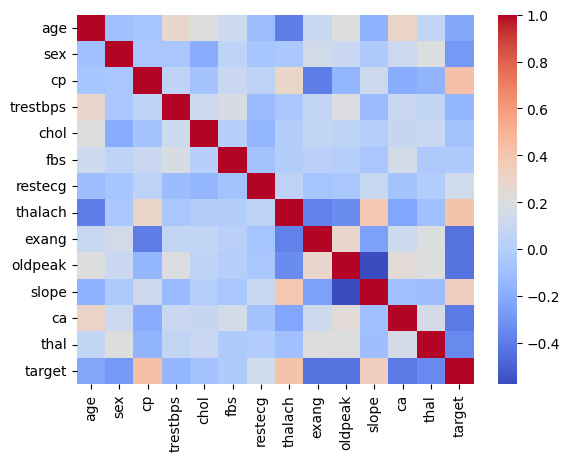

In [ ]:
sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
plt.show()

**Handle Outliers**

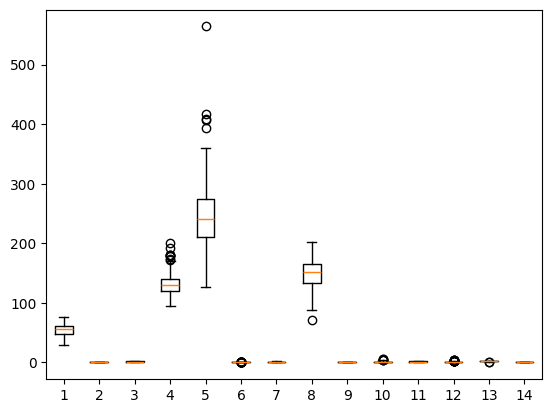

In [ ]:
plt.boxplot(num_df)
plt.show()

In [ ]:
def remove_outliers(df,column_name):
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        df[column_name] = df[column_name].clip(upper=upper_bound)
        df[column_name] = df[column_name].clip(lower=lower_bound)
        return df[column_name]

In [ ]:
for col in num_cols:
  num_df[col] = remove_outliers(num_df, col)

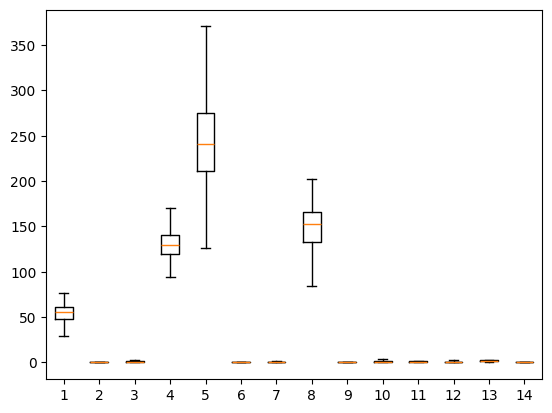

In [ ]:
plt.boxplot(num_df)
plt.show()

**Scale Numerical Features:**

In [ ]:
scale_num=['trestbps','chol','thalach','oldpeak']
for col in scale_num:
  num_df[col] = (num_df[col]-num_df[col].min())/(num_df[col].max()-num_df[col].min())

In [ ]:
data=pd.concat([num_df,cat_df],axis=1)

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,0.351918,0,1,0.711559,0,0.250,2,2.0,3.0,0
1,53,1,0,0.605263,0.315090,0,0,0.601273,1,0.775,0,0.0,3.0,0
2,70,1,0,0.671053,0.196419,0,1,0.346766,1,0.650,0,0.0,3.0,0
3,61,1,0,0.710526,0.315090,0,1,0.652174,0,0.000,2,1.0,3.0,0
4,62,0,0,0.578947,0.687468,0,1,0.185578,0,0.475,1,2.5,2.0,0


- Encoding Categorical columns : No categorical columns to encode

**Train Test Split For Regression**

In [ ]:
X = data.drop('chol', axis=1)
y = data['chol']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,48,1,0,0.394737,0,0,0.694592,0,0.125,1,0.0,3.0,0
291,58,1,0,0.447368,0,0,0.389183,1,0.750,1,2.0,3.0,0
280,45,0,1,0.473684,0,0,0.770944,0,0.150,1,0.0,2.0,1
85,44,1,1,0.342105,0,1,0.728526,0,0.000,2,0.0,2.0,1
239,62,0,0,0.736842,0,1,0.592789,1,0.350,1,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,67,1,0,0.342105,0,1,0.000000,0,0.250,1,0.0,2.0,0
77,63,1,0,0.605263,0,0,0.507953,1,1.000,2,2.0,3.0,0
125,60,0,3,0.736842,0,1,0.737010,0,0.225,2,0.0,2.0,1
522,67,0,2,0.763158,0,1,0.745493,0,0.000,2,1.0,2.0,1


**Build Machine Learning Models**

- Regression Task:

In [ ]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

**Evaluate Models on Test Data**

- For Regression:
    - Evaluate the Linear Regression model:


In [ ]:
mae= mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.030240820609599952
R-squared: -0.12869220762566536
Mean Absolute Error: 0.13542276429416658


**Train-Test Split Classification Task**

In [ ]:
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
163,48,1,0,0.394737,0.605627,0,0,0.694592,0,0.125,1,0.0,3.0
291,58,1,0,0.447368,0.544246,0,0,0.389183,1,0.750,1,2.0,3.0
280,45,0,1,0.473684,0.441944,0,0,0.770944,0,0.150,1,0.0,2.0
85,44,1,1,0.342105,0.384655,0,1,0.728526,0,0.000,2,0.0,2.0
239,62,0,0,0.736842,0.482864,0,1,0.592789,1,0.350,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,67,1,0,0.342105,0.454220,0,1,0.000000,0,0.250,1,0.0,2.0
77,63,1,0,0.605263,0.249616,0,0,0.507953,1,1.000,2,2.0,3.0
125,60,0,3,0.736842,0.466496,0,1,0.737010,0,0.225,2,0.0,2.0
522,67,0,2,0.763158,0.617903,0,1,0.745493,0,0.000,2,1.0,2.0


- Classification Task
    - Logistic Regression

In [ ]:
lr_model=LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr=lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8032786885245902
Precision: 0.7428571428571429
Recall: 0.896551724137931
F1 Score: 0.8125


  - K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("recall_score:", recall_score(y_test, y_pred_knn))
print("f1_score:", f1_score(y_test, y_pred_knn))

Accuracy: 0.7377049180327869
Precision: 0.6756756756756757
recall_score: 0.8620689655172413
f1_score: 0.7575757575757576


- Naive Bayes

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_NB))
print("Precision:", precision_score(y_test, y_pred_NB))
print("Recall score:", recall_score(y_test, y_pred_NB))
print("F1 score:", f1_score(y_test, y_pred_NB))

Accuracy: 0.8524590163934426
Precision: 0.8333333333333334
Recall score: 0.8620689655172413
F1 score: 0.847457627118644
